In [1]:
import numpy as np
import pandas as pd
import re
import nltk

In [2]:
df=pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['review']=df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [4]:
def remove_html_tags(text):
    clean = re.compile(r'<[^/]+/>')
    return clean.sub('', text)

In [5]:
df['review'] = df['review'].apply(remove_html_tags)
# pd.set_option('display.max_colwidth', None)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [6]:
# import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
def remove_stopwords(text):
    new_words=[]
    stop_words=set(stopwords.words('english'))
    for word in text.split():
        if word not in stop_words:
            new_words.append(word)
    return " ".join(new_words)

In [8]:
df["review"]=df["review"].apply(remove_stopwords)
# pd.set_option('display.max_colwidth', None)
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production. filming technique...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there's family little boy (jake) thi...,negative
4,"petter mattei's ""love time money"" visually stu...",positive


In [9]:
from nltk.stem.porter import PorterStemmer

In [10]:
ps=PorterStemmer()
def word_stemmize(text):
    stemmed_words=[]
    for word in text.split():
        stemmed_words.append(ps.stem(word))
    return " ".join(stemmed_words)

In [11]:
df["review"]=df["review"].apply(word_stemmize)
# pd.set_option('display.max_colwidth', None)
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hooked. r...,positive
1,wonder littl production. film techniqu unassum...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic there' famili littl boy (jake) think the...,negative
4,"petter mattei' ""love time money"" visual stun f...",positive


In [12]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
vocab_size=5000

In [14]:
def one_hot_encode(text):
    encoded_text=one_hot(text, vocab_size)
    # padded_text=pad_sequences([encoded_text],maxlen=maxlen,padding='post')
    return encoded_text

In [15]:
all_reviews=[]

for i in range(df.shape[0]):
  all_reviews.append(df['review'][i])

In [16]:
all_reviews

["one review mention watch 1 oz episod hooked. right, exactli happen me.th first thing struck oz brutal unflinch scene violence, set right word go. trust me, show faint heart timid. show pull punch regard drugs, sex violence. hardcore, classic use word.it call oz nicknam given oswald maximum secur state penitentary. focus mainli emerald city, experiment section prison cell glass front face inwards, privaci high agenda. em citi home many..aryans, muslims, gangstas, latinos, christians, italians, irish more....so scuffles, death stares, dodgi deal shadi agreement never far away.i would say main appeal show due fact goe show dare. forget pretti pictur paint mainstream audiences, forget charm, forget romance...oz mess around. first episod ever saw struck nasti surreal, say readi it, watch more, develop tast oz, got accustom high level graphic violence. violence, injustic (crook guard who'll sold nickel, inmat who'll kill order get away it, well mannered, middl class inmat turn prison bitch

In [17]:
encoded_reviews=[]
for review in all_reviews:
  encoded_reviews.append(one_hot_encode(review))

In [18]:
padded_reviews=pad_sequences(encoded_reviews,maxlen=200,padding='post')
padded_reviews[0:10]

array([[ 148,  730, 4522, ...,    0,    0,    0],
       [3104, 1900, 3303, ...,    0,    0,    0],
       [4581, 3104, 4570, ...,    0,    0,    0],
       ...,
       [ 613, 4029,  141, ...,    0,    0,    0],
       [3271, 2771, 1091, ...,    0,    0,    0],
       [2273, 2196, 2748, ...,    0,    0,    0]], dtype=int32)

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
num_features=128
lstm_model=keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size,output_dim=num_features,input_length=10000),
    keras.layers.Bidirectional(keras.layers.LSTM(128,return_sequences=True)),
    keras.layers.LSTM(64),
    keras.layers.Dense(1,activation='sigmoid')
])
# lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
lstm_model.build((None, 10000))
print(lstm_model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10000, 128)          │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 10000, 256)          │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 985,409 (3.76 MB)

 Trainable params: 985,409 (3.76 MB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
df["sentiment"]=df["sentiment"].apply(lambda x: 1 if x=="positive" else 0)
df.head()

,review,sentiment
0,one review mention watch 1 oz episod hooked. r...,1
1,wonder littl production. film techniqu unassum...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there' famili littl boy (jake) think the...,0
4,"petter mattei' ""love time money"" visual stun f...",1


In [23]:
X=np.array(padded_reviews)
y=np.array(df['sentiment'])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
history=lstm_model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5814 - loss: 0.5980 - val_accuracy: 0.5181 - val_loss: 0.7873
Epoch 2/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.5812 - loss: 0.5764 - val_accuracy: 0.5222 - val_loss: 0.8450
Epoch 3/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.6030 - loss: 0.5667 - val_accuracy: 0.5199 - val_loss: 0.9013
Epoch 4/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6054 - loss: 0.5602 - val_accuracy: 0.5089 - val_loss: 0.9338
Epoch 5/5
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6247 - loss: 0.5482 - val_accuracy: 0.5049 - val_loss: 1.0320


In [27]:
import matplotlib.pyplot as plt

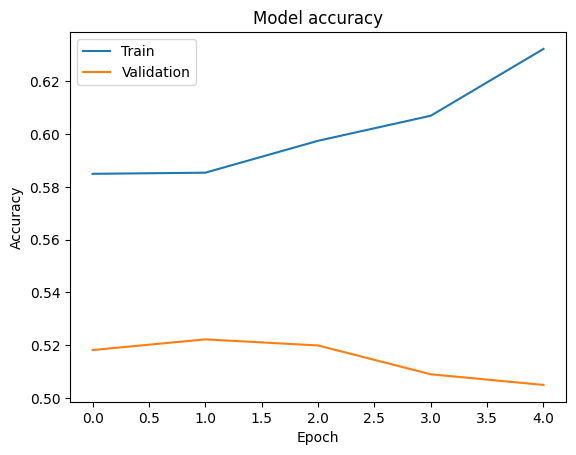

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

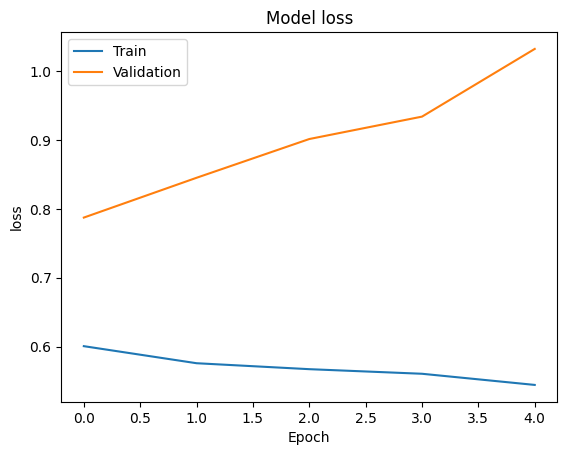

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [35]:
lstm_model.evaluate(X_test,y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5056 - loss: 1.0636


[1.0319939851760864, 0.5048934817314148]

In [31]:
X_train[0]

array([2811, 1867,  443, 4570, 4285, 2220, 1095, 3588,  552, 1095, 1408,
       1384, 4412, 2117, 2421, 4007, 2858,  515, 2143, 3680, 2803, 4883,
       1441, 3879, 3738,  624,  522, 3222, 2661, 2041, 3700, 2901, 1826,
       2774, 3371, 3240, 3026, 4265, 4291, 3143, 2901,  113, 1841, 1900,
       4205, 4570, 3198, 2457,  781, 3027, 2621, 2242, 2656, 3170, 3170,
       4702, 3751, 1794, 1794, 1794,  856, 4570, 1719, 2440, 1585,  832,
       1457,  545,  368, 4386, 1945, 3927, 1291, 3122, 4377, 2251,  368,
        804, 3049, 1897, 1618, 3261,  366, 1041,  666,  185, 2907, 2935,
       1112, 4883, 2363, 1914, 4200, 2109, 2731, 1112, 2249, 4570, 1776,
       1776, 3278,   31, 3802, 1150, 1112,  739, 4200,  148,   94, 3255,
       3882, 1897, 4007, 4370,  164, 3994,  226, 1498,  822,  552, 2404,
       3750,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   